In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
p = np.linspace(0.1, 0.98, 45)
# количество разбиений
G = 10
# количество генераций в каждом разбиении
N = 100
# размер решетки
L = 100

In [ ]:
dist = [] # список, который будет хранить размеры кластеров для разных значений концентраций
ph = []
pv = []
phv = []
largest_cluster = np.zeros((45, N * G))

# парсим файл с результатами
f = open("/content/drive/My Drive/test3.txt")
for c in range(45):
    f.readline()
    ph_tmp = []
    pv_tmp = []
    phv_tmp = []
    tmp = []
    for j in range(G):
        for i in range(N):
            line = f.readline().split()
            nmax = 0
            for elem in line:
                if int(elem) > 0:
                    tmp.append(int(elem))
                if int(elem) > nmax:
                    nmax = int(elem)
            largest_cluster[c][N*j + i] = nmax
        t = [float(x) for x in f.readline().split()]
        ph_tmp.append(t[0])
        pv_tmp.append(t[1])
        phv_tmp.append(t[2])
    dist.append(tmp)
    ph.append(ph_tmp)
    pv.append(pv_tmp)
    phv.append(phv_tmp)

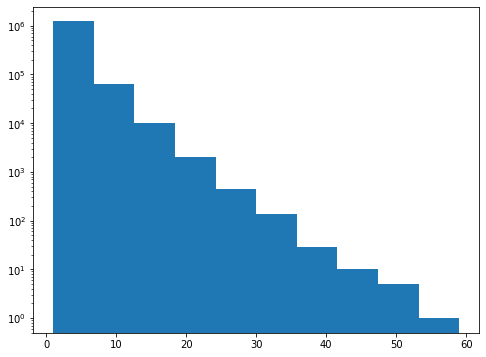

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(dist[10], density=False, log=True) # пример распределения
plt.show()

**Reduced averaged cluster size:**

$$ I_{av} = \frac{1}{G} \left[ \left( \sum_{n = 1}^{n_{max}} i_n n^2 \right) - n^2_{max} \right],$$

$G$ — число раскрашенных узлов,

$i_n$ — число кластеров размера $n$

$n_{max}$ — максимальный размер кластера

In [ ]:
hist_map = []
mean_largest_cluster = np.zeros(45)
for c in range(45):
    tmp = {}
    mean_largest_cluster[c] = np.mean(largest_cluster[c])
    for sz in dist[c]:
        if sz in tmp:
            tmp[sz] = tmp[sz] + (1 / (N * G))
        else:
            tmp[sz] = 1 / (N * G)
    hist_map.append(tmp)

In [ ]:
Iav = np.zeros(45)
for c in range(45):
    for sz in hist_map[c]:
        Iav[c] = Iav[c] + (hist_map[c][sz] * sz * sz)
    Iav[c] = Iav[c] - (mean_largest_cluster[c]**2)
    Iav[c] = Iav[c] / (p[c] * L**2)

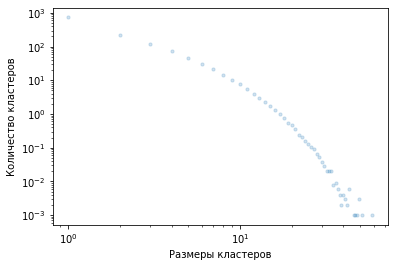

In [ ]:
# концентрация - 0.3
x, y = zip(*sorted(hist_map[10].items()))

#plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, alpha=0.2, )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Размеры кластеров')
plt.ylabel('Количество кластеров')
plt.show()

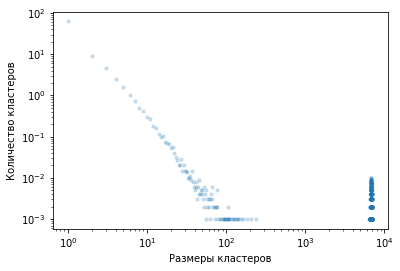

In [ ]:
# концентрация - 0.7
x, y = zip(*sorted(hist_map[30].items()))

#plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Размеры кластеров')
plt.ylabel('Количество кластеров')
plt.show()

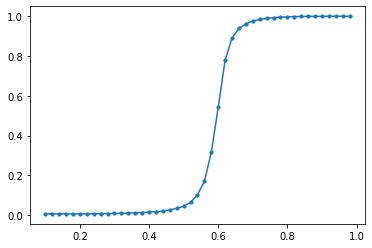

In [ ]:
#plt.figure(figsize=(8, 6))
plt.plot(p, mean_largest_cluster / (p * L**2))
plt.scatter(p, mean_largest_cluster / (p * L**2), s=10)
plt.show()

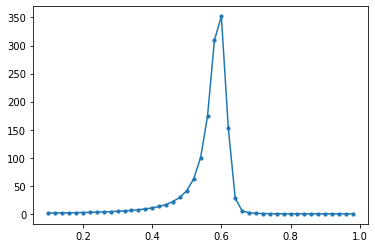

In [ ]:
#plt.figure(figsize=(8, 6))
plt.plot(p, Iav)
plt.scatter(p, Iav, s=10)
plt.show()

In [ ]:
ph_mean = np.array(ph).mean(axis=1)
pv_mean = np.array(pv).mean(axis=1)
phv_mean = np.array(phv).mean(axis=1)

ph_max = np.array(ph).max(axis=1)
pv_max = np.array(pv).max(axis=1)
phv_max = np.array(phv).max(axis=1)

ph_min = np.array(ph).min(axis=1)
pv_min = np.array(pv).min(axis=1)
phv_min = np.array(phv).min(axis=1)

<ErrorbarContainer object of 3 artists>

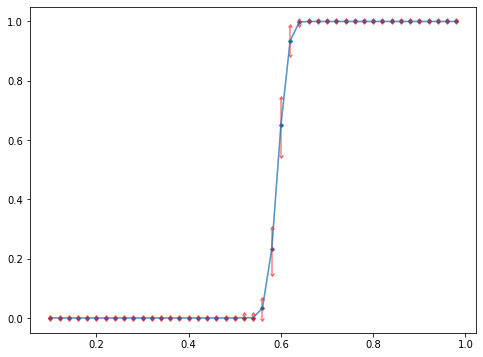

In [ ]:
# Зависимость вероятности протекания по горизонтали от концентрации
plt.figure(figsize=(8, 6))
plt.scatter(p, ph_mean, s=10)
plt.errorbar(p, ph_mean, ph_max - ph_mean, lolims=True, ecolor='red', alpha=0.5, capsize=2)
plt.errorbar(p, ph_mean, ph_mean - ph_min, uplims=True, ecolor='red', alpha=0.5, capsize=2)

<ErrorbarContainer object of 3 artists>

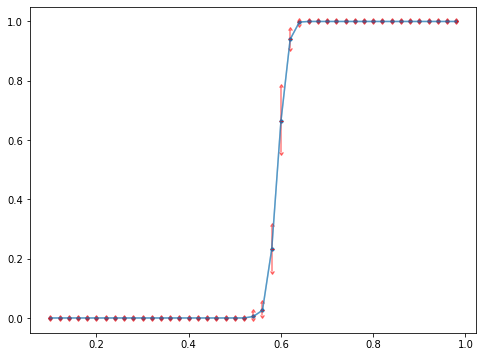

In [ ]:
# Зависимость вероятности протекания по вертикали от концентрации
plt.figure(figsize=(8, 6))
plt.scatter(p, pv_mean, s=10)
plt.errorbar(p, pv_mean, pv_max - pv_mean, lolims=True, ecolor='red', alpha=0.5, capsize=2)
plt.errorbar(p, pv_mean, pv_mean - pv_min, uplims=True, ecolor='red', alpha=0.5, capsize=2)

<ErrorbarContainer object of 3 artists>

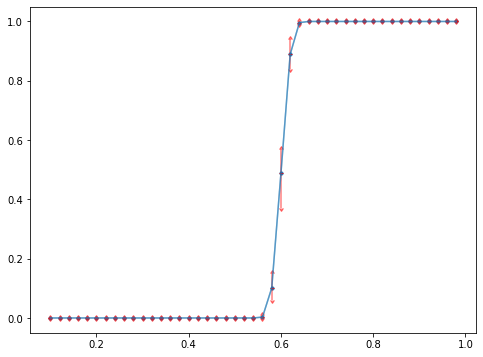

In [ ]:
# Зависимость вероятности протекания по обоим направлениям от концентрации
plt.figure(figsize=(8, 6))
plt.scatter(p, phv_mean, s=10)
plt.errorbar(p, phv_mean, phv_max - phv_mean, lolims=True, ecolor='red', alpha=0.5, capsize=2)
plt.errorbar(p, phv_mean, phv_mean - phv_min, uplims=True, ecolor='red', alpha=0.5, capsize=2)

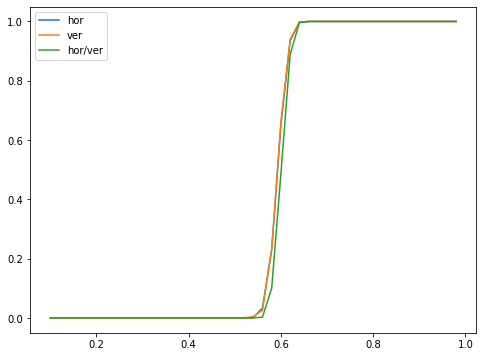

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(p, ph_mean, label='hor')
plt.plot(p, pv_mean, label='ver')
plt.plot(p, phv_mean, label='hor/ver')
plt.legend()